c:\Users\Marim\Downloads\Heart__Disease_Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🔹 Logistic Regression Best Params (GridSearch): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
CV Best Score: 0.619812925170068
Test Accuracy: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.25      0.18      0.21        11
           2       0.33      0.29      0.31         7
           3       0.36      0.57      0.44         7
           4       0.00      0.00      0.00         3

    accuracy                           0.61        61
   macro avg       0.36      0.38      0.37        61
weighted avg       0.59      0.61      0.59        61



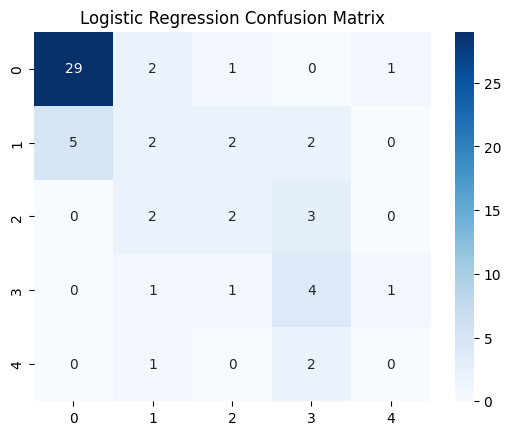

🔹 Random Forest Best Params (RandomizedSearch): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}
CV Best Score: 0.6076530612244898
Test Accuracy: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        33
           1       0.12      0.09      0.11        11
           2       0.00      0.00      0.00         7
           3       0.25      0.14      0.18         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        61
   macro avg       0.22      0.25      0.22        61
weighted avg       0.44      0.57      0.49        61



c:\Users\Marim\Downloads\Heart__Disease_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Marim\Downloads\Heart__Disease_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Marim\Downloads\Heart__Disease_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

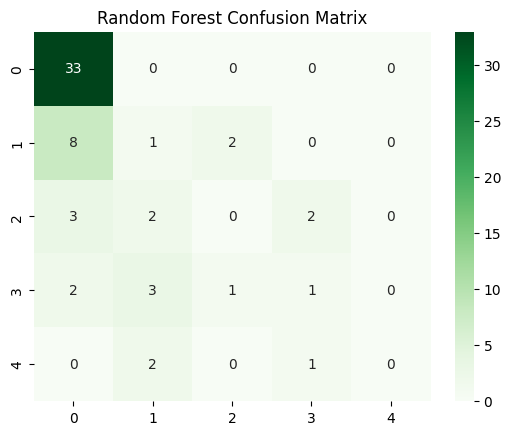

🔹 SVM Best Params (GridSearch): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
CV Best Score: 0.5868197278911564
Test Accuracy: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        33
           1       0.50      0.18      0.27        11
           2       0.20      0.14      0.17         7
           3       0.25      0.29      0.27         7
           4       0.00      0.00      0.00         3

    accuracy                           0.61        61
   macro avg       0.35      0.32      0.31        61
weighted avg       0.56      0.61      0.57        61



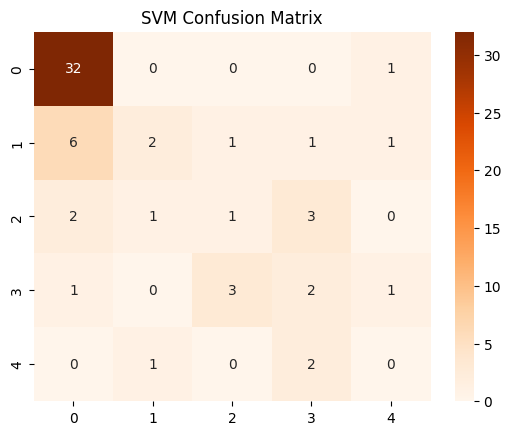

🔹 Decision Tree Best Params (RandomizedSearch): {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
CV Best Score: 0.5289115646258503
Test Accuracy: 0.5245901639344263
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.29      0.45      0.36        11
           2       0.09      0.14      0.11         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.52        61
   macro avg       0.24      0.28      0.25        61
weighted avg       0.50      0.52      0.51        61



c:\Users\Marim\Downloads\Heart__Disease_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Marim\Downloads\Heart__Disease_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Marim\Downloads\Heart__Disease_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

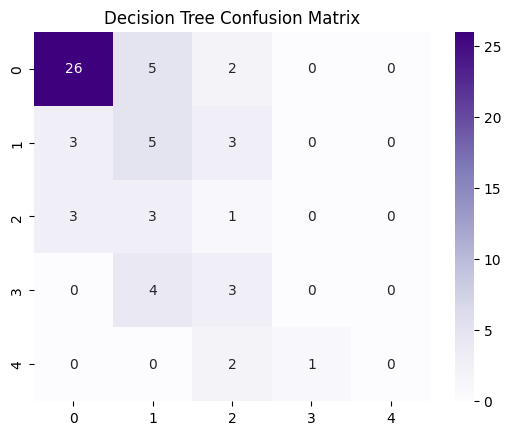

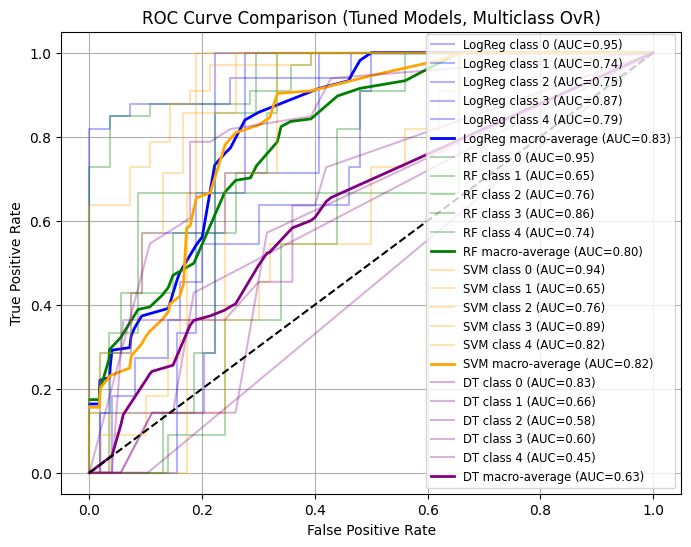

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Step 0: Load dataset
# -----------------------------
file_path = "heart_disease_processed.csv"
df = pd.read_csv(file_path)

# Features & target
X = df.drop(columns=["num"])
y = df["num"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Step 1: Logistic Regression
# -----------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("🔹 Logistic Regression Best Params (GridSearch):", grid_lr.best_params_)
print("CV Best Score:", grid_lr.best_score_)

y_pred_lr = grid_lr.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# -----------------------------
# Step 2: Random Forest
# -----------------------------
rf = RandomForestClassifier(random_state=42)
param_dist_rf = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rand_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=10, cv=5, scoring="accuracy", random_state=42, n_jobs=-1)
rand_rf.fit(X_train, y_train)

print("🔹 Random Forest Best Params (RandomizedSearch):", rand_rf.best_params_)
print("CV Best Score:", rand_rf.best_score_)

y_pred_rf = rand_rf.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# -----------------------------
# Step 3: SVM
# -----------------------------
svm = SVC(probability=True, random_state=42)
param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("🔹 SVM Best Params (GridSearch):", grid_svm.best_params_)
print("CV Best Score:", grid_svm.best_score_)

y_pred_svm = grid_svm.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("SVM Confusion Matrix")
plt.show()

# -----------------------------
# Step 4: Decision Tree
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
param_dist_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rand_dt = RandomizedSearchCV(dt, param_dist_dt, n_iter=10, cv=5, scoring="accuracy", random_state=42, n_jobs=-1)
rand_dt.fit(X_train, y_train)

print("🔹 Decision Tree Best Params (RandomizedSearch):", rand_dt.best_params_)
print("CV Best Score:", rand_dt.best_score_)

y_pred_dt = rand_dt.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Purples")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# -----------------------------
# Step 5: ROC Curves (Multiclass)
# -----------------------------
from sklearn.preprocessing import label_binarize

# Binarize the output
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(8, 6))

models_roc = {
    "LogReg": grid_lr.best_estimator_,
    "RF": rand_rf.best_estimator_,
    "SVM": grid_svm.best_estimator_,
    "DT": rand_dt.best_estimator_
}

colors = ["b", "g", "orange", "purple"]
for (name, model), color in zip(models_roc.items(), colors):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        # For SVM with probability=False, fallback to decision_function
        y_score = model.decision_function(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, alpha=0.3,
                 label=f"{name} class {i} (AUC={roc_auc[i]:.2f})")
    # Optionally, plot the average macro ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    mean_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, color=color, lw=2,
             label=f"{name} macro-average (AUC={mean_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Tuned Models, Multiclass OvR)")
plt.legend(loc="lower right", fontsize="small")
plt.grid(True)
plt.show()






In [5]:
import joblib

# -----------------------------
# Step 6: Model Selection (Best Model)
# -----------------------------
# Collect performance metrics
results = {}
for name, model in models_roc.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # For ROC AUC (macro-average)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    auc_score = auc(fpr, tpr)

    results[name] = {"accuracy": acc, "auc": auc_score}

# Pick the best model based on AUC
best_model_name = max(results, key=lambda k: results[k]["auc"])
best_model = models_roc[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name}")
print("Performance:", results[best_model_name])

# -----------------------------
# Step 7: Save Best Model
# -----------------------------
# Save pipeline: scaler + model (for reproducibility)
final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", best_model.named_steps["clf"] if hasattr(best_model, "named_steps") else best_model)
])

joblib.dump(final_pipeline, f"best_model_{best_model_name}.pkl")
print(f"✅ Best model saved as best_model_{best_model_name}.pkl")



🏆 Best Model Selected: SVM
Performance: {'accuracy': 0.6065573770491803, 'auc': 0.8898145659768879}
✅ Best model saved as best_model_SVM.pkl


In [17]:
import joblib

# Load the .pkl file
model = joblib.load("best_model_SVM.pkl")

# Print the model details
print("📦 Loaded model object:\n", model)

# If it's a scikit-learn model, you can see the parameters:
print("\n⚙️ Model parameters:\n", model.get_params())

# If it's trained, you can also check the classes:
print("\n🔎 Classes:\n", model.classes_)


📦 Loaded model object:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

⚙️ Model parameters:
 {'memory': None, 'steps': [('scaler', StandardScaler()), ('clf', SVC(C=0.1, kernel='linear', probability=True, random_state=42))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'clf': SVC(C=0.1, kernel='linear', probability=True, random_state=42), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'clf__C': 0.1, 'clf__break_ties': False, 'clf__cache_size': 200, 'clf__class_weight': None, 'clf__coef0': 0.0, 'clf__decision_function_shape': 'ovr', 'clf__degree': 3, 'clf__gamma': 'scale', 'clf__kernel': 'linear', 'clf__max_iter': -1, 'clf__probability': True, 'clf__random_state': 42, 'clf__shrinking': True, 'clf__tol': 0.001, 'clf__verbose': False}

🔎 Classes:
 [0 1 2 3 4]
